<a href="https://colab.research.google.com/github/SaiShashankB/Road-Segmentation/blob/main/Road_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from skimage import filters, measure, color
import tensorflow as tf
import keras
import matplotlib.pyplot as plt



In [3]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-25ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [5]:
!unzip /content/AGRITHON-20230224T120510Z-001.zip

Archive:  /content/AGRITHON-20230224T120510Z-001.zip
  inflating: AGRITHON/1_RGB_Frames-20230219T072636Z-001.zip  
  inflating: AGRITHON/2_Depth_Frames-20230219T072644Z-001.zip  


In [6]:
!unzip /content/AGRITHON/1_RGB_Frames-20230219T072636Z-001.zip -d /content/AGRITHON_UNZIP

Archive:  /content/AGRITHON/1_RGB_Frames-20230219T072636Z-001.zip
  inflating: /content/AGRITHON_UNZIP/1_RGB_Frames/20221117_124001_Color_1668669003122.88769531250000.png  
  inflating: /content/AGRITHON_UNZIP/1_RGB_Frames/20221117_124001_Color_1668669002689.70874023437500.png  
  inflating: /content/AGRITHON_UNZIP/1_RGB_Frames/20221117_124001_Color_1668669002856.32128906250000.png  
  inflating: /content/AGRITHON_UNZIP/1_RGB_Frames/20221117_124001_Color_1668669001723.33569335937500.png  
  inflating: /content/AGRITHON_UNZIP/1_RGB_Frames/20221117_124001_Color_1668669002256.48413085937500.png  
  inflating: /content/AGRITHON_UNZIP/1_RGB_Frames/20221117_124001_Color_1668669003156.20727539062500.png  
  inflating: /content/AGRITHON_UNZIP/1_RGB_Frames/20221117_124001_Color_1668669002789.67700195312500.png  
  inflating: /content/AGRITHON_UNZIP/1_RGB_Frames/20221117_124001_Color_1668669002423.11425781250000.png  
  inflating: /content/AGRITHON_UNZIP/1_RGB_Frames/20221117_124001_Color_166866

In [7]:
!unzip /content/AGRITHON/2_Depth_Frames-20230219T072644Z-001.zip -d /content/AGRITHON_UNZIP

Archive:  /content/AGRITHON/2_Depth_Frames-20230219T072644Z-001.zip
  inflating: /content/AGRITHON_UNZIP/2_Depth_Frames/CSV/Copy of depth_Depth_1668669002922.94750976562500.csv  
  inflating: /content/AGRITHON_UNZIP/2_Depth_Frames/CSV/Copy of depth_Depth_1668669003289.48437500000000.csv  
  inflating: /content/AGRITHON_UNZIP/2_Depth_Frames/CSV/Copy of depth_Depth_1668669002356.44604492187500.csv  
  inflating: /content/AGRITHON_UNZIP/2_Depth_Frames/CSV/Copy of depth_Depth_1668669003089.55102539062500.csv  
  inflating: /content/AGRITHON_UNZIP/2_Depth_Frames/CSV/Copy of depth_Depth_1668669002889.62622070312500.csv  
  inflating: /content/AGRITHON_UNZIP/2_Depth_Frames/CSV/Copy of depth_Depth_1668669002656.36840820312500.csv  
  inflating: /content/AGRITHON_UNZIP/2_Depth_Frames/CSV/Copy of depth_Depth_1668669003122.87084960937500.csv  
  inflating: /content/AGRITHON_UNZIP/2_Depth_Frames/CSV/Copy of depth_Depth_1668669002489.74755859375000.csv  
  inflating: /content/AGRITHON_UNZIP/2_Depth

In [8]:
ReadPath = '/content/AGRITHON_UNZIP'
name1  = '20221117_124001_Color_1668669001656.68847656250000.png'
name2 = '20221117_124001_Depth_1668669001656.67163085937500.png'

In [9]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [10]:
rgb = cv2.imread(ReadPath + '/1_RGB_Frames/' + name1)
distance = cv2.imread(ReadPath + '/2_Depth_Frames/IMG/' + name2, -1)
print(rgb)
print(distance)
distance[distance > 10000] = 0     # do not consider the pixels with distances over 10m (RealSense depth range)
Baseline = 55.0871
Focallength = 1367.6650
disparity = Focallength * Baseline / distance
rgb = tf.keras.preprocessing.image.img_to_array(rgb, dtype='uint8')
distance = tf.keras.preprocessing.image.img_to_array(distance, dtype='uint8')
rgb = np.expand_dims(rgb, axis=0)
distance = np.expand_dims(distance, axis=0)
rgb = tf.keras.applications.resnet50.preprocess_input(rgb)
disparity = tf.keras.applications.resnet50.preprocess_input(disparity)
disparity[np.isinf(disparity)] = 0
disparity = np.round(disparity)
print('Successfully read data.')

[[[ 68  59  54]
  [ 91  82  77]
  [148 146 122]
  ...
  [ 46  43  33]
  [ 40  40  29]
  [ 33  33  22]]

 [[ 67  58  53]
  [ 89  80  75]
  [150 148 124]
  ...
  [ 46  43  33]
  [ 40  40  29]
  [ 33  33  22]]

 [[ 67  59  52]
  [ 76  68  61]
  [158 153 130]
  ...
  [ 45  41  34]
  [ 38  37  29]
  [ 34  33  25]]

 ...

 [[ 64  63  60]
  [ 59  58  55]
  [ 57  56  53]
  ...
  [ 88  84  77]
  [ 87  83  83]
  [ 91  87  87]]

 [[ 62  61  58]
  [ 62  61  58]
  [ 59  58  55]
  ...
  [ 81  80  72]
  [ 86  82  83]
  [ 90  86  87]]

 [[ 61  62  59]
  [ 62  63  60]
  [ 62  61  58]
  ...
  [ 78  76  70]
  [ 85  81  82]
  [ 88  84  85]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0

In [11]:
# Compute V-disparity
# v-disparity
m = disparity.shape[0]
n = np.max(np.max(disparity)) + 1
n = n.astype(int)
vdis = np.zeros((m, n))
for i in range(m):
    for j in range(n):
        vdis[i, j] = len(np.where(disparity[i, :] == (j - 1))[0])

In [12]:
# steerable filter
theta = [0, 45, 90]
vdisSteerable = np.zeros((vdis.shape[0], vdis.shape[1], 3))  # use steerable filter in 3 directions
for i in range(len(theta)):
    vdisSteerable[:, :, i] = gaussian_filter(vdis, theta[i], 3)

In [13]:
# select the pixels that have much difference between 3 directions
vdisSteerableDiff = np.zeros(vdis.shape)
for i in range(vdisSteerable.shape[0]):
    for j in range(vdisSteerable.shape[1]):
        vdisSteerableDiff[i, j] = np.max(vdisSteerable[i, j, :]) - np.min(vdisSteerable[i, j, :])
vdisFilter = np.zeros(vdis.shape)
vdisFilterThresh = 30
vdisFilter[vdisSteerableDiff > vdisFilterThresh] = 1

print('Successfully compute v-disparity.')

Successfully compute v-disparity.


In [16]:
# convert vdisFilter to CV_8UC1
vdisFilter = vdisFilter.astype('uint8')

# Hough Transform
lines = cv2.HoughLines(vdisFilter, 1, np.pi/180, 200)
if lines is None:
    print('Hough transform failed.')
    exit()

# extract endpoints of the line
line = lines[0][0]
rho = line[0]
theta = line[1]
a = np.cos(theta)
b = np.sin(theta)
x0 = round(a*rho)
y0 = round(b*rho)
x1 = int(x0 + 1000*(-b))
y1 = int(y0 + 1000*(a))
x2 = int(x0 - 1000*(-b))
y2 = int(y0 - 1000*(a))

# perform drivable area segmentation based on Hough Transform
drivableInitial = np.zeros(disparity.shape)
drivableInitialThresh = 3
for i in range(y1, y2):
    d = (x2 - x1) / (y2 - y1) * i + (x1 * y2 - x2 * y1) / (y2 - y1)
    for j in range(disparity.shape[1]):
        if disparity[i, j] > d - drivableInitialThresh and disparity[i, j] < d + drivableInitialThresh:
            drivableInitial[i, j] = 1
drivableFinal = cv2.medianBlur(drivableInitial.astype('uint8'), 5)


print('Successfully perform drivable area segmentation.')
print(drivableFinal)

Successfully perform drivable area segmentation.
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [17]:
print(disparity.shape)

(480, 848, 3)


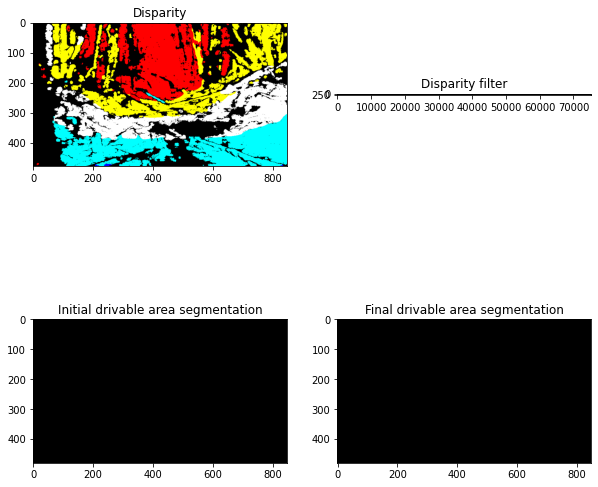

In [18]:
# visualize the drivable area segmentation
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(disparity, cmap='gray')
plt.title('Disparity')

plt.subplot(2, 2, 2)
plt.imshow(vdisFilter, cmap='gray')
plt.title('Disparity filter')

plt.subplot(2, 2, 3)
plt.imshow(drivableInitial, cmap='gray')
plt.title('Initial drivable area segmentation')

plt.subplot(2, 2, 4)
plt.imshow(drivableFinal, cmap='gray')
plt.title('Final drivable area segmentation')

plt.show()

In [19]:
print(drivableFinal.shape)

(480, 848, 3)


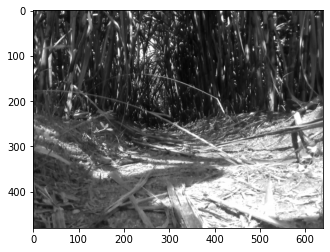

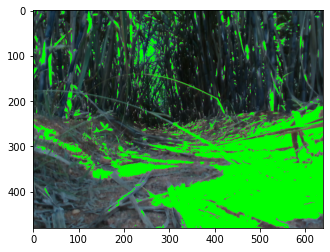

In [20]:
# Load the image
img = plt.imread('/content/AGRITHON_UNZIP/1_RGB_Frames/20221117_124001_Color_1668669001656.68847656250000.png')

# Convert to grayscale
gray = np.mean(img, axis=-1)

# Display the grayscale image
plt.imshow(gray, cmap='gray')
plt.show()

outpath = '/content/drivable.png'

# Save the grayscale image
cv2.imwrite(outpath, gray)

# Load the drivable area segmentation
drivable = cv2.imread('/content/drivable.png', cv2.IMREAD_GRAYSCALE)

# Threshold the image to get a binary image of the drivable area
ret, thresh = cv2.threshold(drivable, 0.5, 1, cv2.THRESH_BINARY)

# Convert the binary image to a 3-channel grayscale image
drivable_area = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

# Create a mask for the drivable area
mask = np.all(drivable_area == [1, 1, 1], axis=-1)

# Mark the drivable area as green
img_with_drivable_area = img.copy()
img_with_drivable_area[mask] = [0, 1, 0]

# Display the result
plt.imshow(img_with_drivable_area)
plt.show()

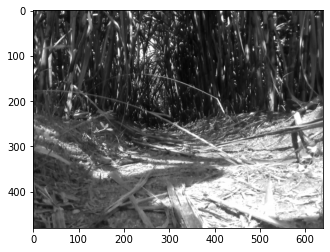

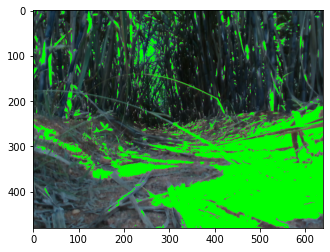

In [21]:
# Load the image
img = plt.imread('/content/AGRITHON_UNZIP/1_RGB_Frames/20221117_124001_Color_1668669001656.68847656250000.png')

# Convert to grayscale
gray = np.mean(img, axis=-1)

# Display the grayscale image
plt.imshow(gray, cmap='gray')
plt.show()
outpath = '/content/drivable.png'
#save the image
cv2.imwrite(outpath, gray)

# load the drivable area segmentation
drivable = cv2.imread('/content/drivable.png', cv2.IMREAD_GRAYSCALE)
drivable_final = (drivable > 0.5).astype(np.uint8) * 255

# create a boolean mask of the drivable area
mask = drivable_final.astype(bool)

# overlay the drivable area on the original image
img_with_drivable_area = img.copy()
img_with_drivable_area[mask] = [0, 255, 0]

# Display the result
plt.imshow(img_with_drivable_area)
plt.show()